## Visualization of La Palma Earthquake Data

Using the subset of IGN data specific to La Palma. This subset was prepared using `screening.ipynb` and saved to `lapalma.csv`.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [11]:
df = pd.read_csv('./lapalma.csv')
df.head()

,Event,Date,UTC time,Local time(*),Latitude,Longitude,Depth(km),Magnitude,Mag. type,Max. int,Region,More Info
0,es2021wocei,2021-11-17,17:08:10,17:08:10,28.5661,-17.8336,11.0,3.1,mbLg,NaN,SW VILLA DE MAZO.ILP,NaN
1,es2021wobpr,2021-11-17,16:50:53,16:50:53,28.6058,-17.8549,37.0,2.9,mbLg,NaN,SE EL PASO.ILP,NaN
2,es2021wobfz,2021-11-17,16:39:11,16:39:11,28.5619,-17.8304,12.0,2.8,mbLg,NaN,NE FUENCALIENTE DE LA PALMA.IL,NaN
3,es2021wobep,2021-11-17,16:38:12,16:38:12,28.5580,-17.8386,13.0,3.1,mbLg,NaN,NE FUENCALIENTE DE LA PALMA.IL,NaN
4,es2021woazj,2021-11-17,16:32:05,16:32:05,28.5542,-17.8353,14.0,3.0,mbLg,NaN,NE FUENCALIENTE DE LA PALMA.IL,NaN


In [12]:
df.describe()

,Latitude,Longitude,Depth(km),Magnitude,More Info
count,6195.000000,6195.000000,6195.000000,6195.000000,0.0
mean,28.566620,-17.842178,12.900630,2.719435,NaN
std,0.015506,0.021570,7.297977,0.500897,NaN
min,28.477500,-17.969500,0.000000,1.500000,NaN
25%,28.558500,-17.848950,10.100000,2.500000,NaN
50%,28.563500,-17.838000,11.100000,2.700000,NaN
75%,28.570900,-17.830400,13.100000,3.000000,NaN
max,28.697000,-17.757000,42.200000,5.000000,NaN


In [13]:
df['Depth'] = 'Crustal (<20km)'
df.loc[df['Depth(km)'] >= 20, 'Depth'] = 'Mantle (>20km)'

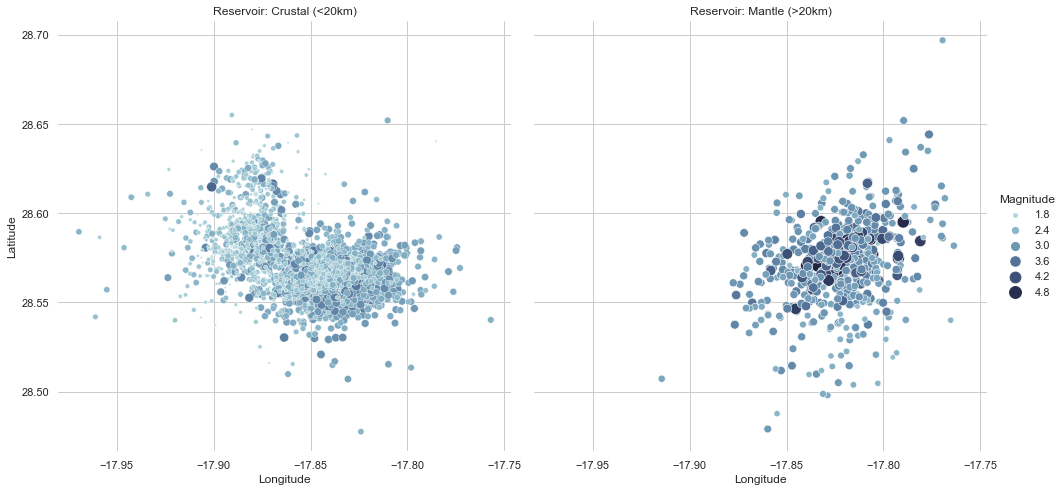

In [ ]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.relplot(
    data=df,
    x="Longitude", y="Latitude",
    size="Magnitude", hue="Magnitude",
    col='Depth',
    palette=cmap,
    height=7,
    sizes=(1,150),
).set_titles("Reservoir: {col_name}")
_=g.despine(left=True, bottom=True)


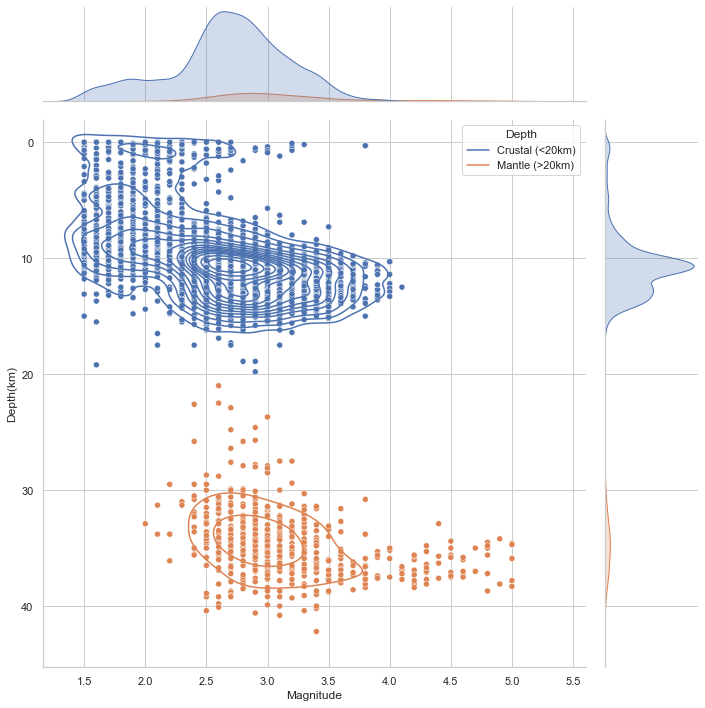

In [ ]:
g = sns.jointplot(x="Magnitude", y="Depth(km)", data=df,
                  kind='scatter', hue="Depth",
                  color="m", height=10)
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=15)
g.fig.axes[0].invert_yaxis();

In [ ]:
df['timestamp'] = pd.to_numeric(pd.to_datetime(df['Date'] + ' ' + df['UTC time']))
df.tail()

,Event,Date,UTC time,Local time(*),Latitude,Longitude,Depth(km),Magnitude,Mag. type,Max. int,Region,More Info,Depth,timestamp
6190,es2021rwszu,2021-09-12,07:23:16,08:23:16,28.5595,-17.8583,12.5,1.8,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN,Crustal (<20km),1631431396000000000
6191,es2021rwswi,2021-09-12,07:19:17,08:19:17,28.5568,-17.8627,12.8,1.8,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN,Crustal (<20km),1631431157000000000
6192,es2021rwsqe,2021-09-12,07:12:02,08:12:02,28.5624,-17.8637,12.5,1.8,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN,Crustal (<20km),1631430722000000000
6193,es2021rwsks,2021-09-12,07:05:46,08:05:46,28.5659,-17.8406,9.7,1.8,mbLg,NaN,NE FUENCALIENTE DE LA PALMA.IL,NaN,Crustal (<20km),1631430346000000000
6194,es2021rupkb,2021-09-11,03:18:42,04:18:42,28.5675,-17.8705,10.6,1.5,mbLg,NaN,N FUENCALIENTE DE LA PALMA.ILP,NaN,Crustal (<20km),1631330322000000000


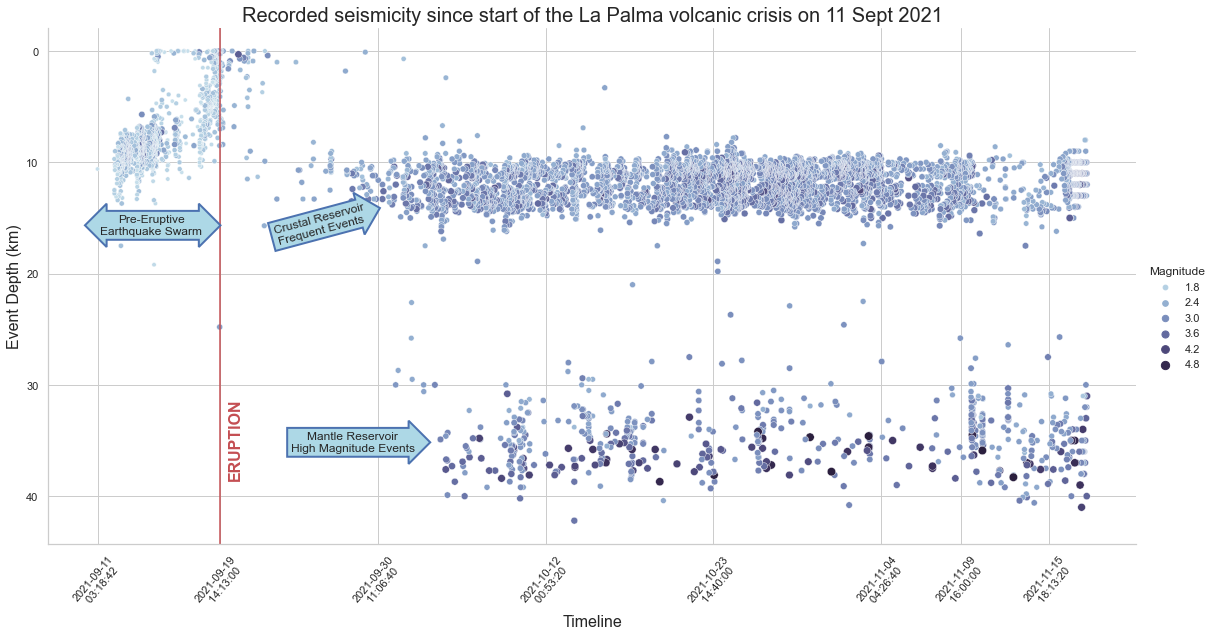

In [14]:
def get_numeric_datetime(dt: str):
    return pd.to_numeric(pd.to_datetime([dt]))[0]

sns.relplot(
    data=df,
    x="timestamp", y="Depth(km)",
    hue="Magnitude", size="Magnitude", 
    kind="scatter",palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    height=8, aspect=2
)
plt.gca().invert_yaxis()
xticks = plt.gca().get_xticks()
new_xticks = [get_numeric_datetime('2021-09-11 03:18:42'),
    get_numeric_datetime('2021-09-19 14:13:00')]
new_xticks = np.append(new_xticks, xticks[2:-1])
new_xticks = np.append(new_xticks, [get_numeric_datetime('2021-11-9 16:00:00')])

plt.gca().set_xticks(new_xticks)
xtick_labels = [pd.to_datetime(tm).strftime('%Y-%m-%d\n %H:%M:%S') for tm in new_xticks]
plt.gca().set_xticklabels(xtick_labels, rotation=50)



plt.title('Recorded seismicity since start of the La Palma volcanic crisis on 11 Sept 2021', fontdict=dict(fontsize=20))
plt.xlabel('Timeline', fontsize=16)
plt.ylabel('Event Depth (km)', fontsize=16);


plt.axvline(x=new_xticks[1], ymin=0, color='r')
plt.annotate('ERUPTION', (0.165, 0.13), rotation=90, xycoords='axes fraction', fontweight='bold', fontsize=16, color='r')
plt.annotate("Pre-Eruptive\nEarthquake Swarm", (0.095, 0.6), xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="darrow,pad=0.3", fc="lightblue", ec="b", lw=2))
plt.annotate("Crustal Reservoir\nFrequent Events", (0.25, 0.58), rotation=15,xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2))
plt.annotate("Mantle Reservoir\nHigh Magnitude Events", (0.28, 0.18), xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2));

